In [5]:
!pip install langgraph langsmith

In [6]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.9 MB/s eta 0:00:00


In [7]:
from google.colab import userdata
groq_api_key = userdata.get('groq_api_key')
langsmith = userdata.get('LANGSMITH_API_KEY')

In [8]:
import os
os.environ["LANGSMITH_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "Tut_langgraph"

In [9]:
from langchain_groq import ChatGroq

In [10]:
llm = ChatGroq(groq_api_key=groq_api_key, model_name="llama3-70b-8192")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7dd6c03d0880>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7dd6c03d1540>, model_name='llama3-70b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

##CHATBOT using LangGraph


In [11]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [16]:
class State(TypedDict):
  messages:Annotated[list,add_messages]


graph_builder = StateGraph(State)

In [17]:
graph_builder

In [18]:
def chatbot(state:State):
  return {"messages":llm.invoke(state["messages"])}

In [19]:
graph_builder.add_node("chatbot",chatbot)

In [20]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [23]:
graph=graph_builder.compile()

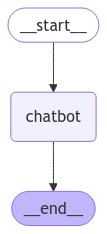

In [24]:
# Displaying Graph

from IPython.display import Image,display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [26]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value['messages'].content)

User: who is Andrew kalpathy
dict_values([{'messages': AIMessage(content='Andrew Kalpathy! From what I gathered, Andrew Kalpathy is a popular Canadian film editor, director, and screenwriter. He is best known for his work on various documentaries, short films, and feature films.\n\nOne of his notable works is the 2019 documentary film " Tigers" (also known as "Playing with Fire" in some regions), which explores the dark side of the infant formula industry and its impact on Chinese consumers. Kalpathy co-directed and edited the film, which received critical acclaim and won several awards.\n\nKalpathy has also worked on other documentaries, such as "The Anthem" (2017) and "The Messenger" (2015), which focus on social and environmental issues. His work often highlights important global concerns and sheds light on lesser-known stories.\n\nIf you\'re interested in learning more about Andrew Kalpathy\'s work or watching his films, I recommend checking out online platforms like IMDb, Vimeo, o